<div class="alert alert-success">
<strong>Assignment 2</strong>
    
    A day in the life of a Minervan—Part I

</div>

This is a Location-Based Assignment (LBA). You will build a computerized activity scheduler for a day in your current rotation city based on a priority queue. You will create a list of activities you plan to do in a day in your rotation city, each with its duration and task dependencies. 
Important notes:
> - Watch [this video](https://bit.ly/3HKtdbw) recorded by Joram Erbarth (M23) with advice on how to prepare for CS110 assignments. Most of the suggestions will also apply to other CS courses, so make sure to bookmark this video for future reference. 
> - Make sure you fill in any place that says `###YOUR DOCSTRING HERE`, `###YOUR CODE HERE` or `"YOUR ANSWER HERE"`.
> - Feel free to add more cells (Markdown and coding) to the ones always provided in each question to expand your answers, as needed. 
> - Given the Covid-19 pandemic, please follow all the local guidelines rigorously.
> - Please be aware of the weight of this assignment which should reflect both time and effort management. Please plan accordingly.
> - Please refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?usp=sharing) on how to submit your assignment materials.
> - If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to the instructors' OHs.


🏁 **Setting up:**

Start by stating your name and identifying your collaborators. Please comment on the nature of the collaboration (for example, if you briefly discussed the strategy to solving problem 1, say so, and explicitly point out what exactly did you discuss). 

<div class="alert alert-warning">
<strong> Name:</strong> Yousaf
    <hr>
<strong>Collaborators: </strong> Raphael Khalid
    <hr>
<strong>Details: </strong> Helped me with the understanding of the use of two priority queues.
</div>

## An Overview
### Revisiting the activity scheduler from the “Heaps and priority queues” lesson

Your activity scheduler receives a list of tasks to be performed in a day, with the following schema:

|id | description | duration | dependencies | status
| --- | --- | --- | --- | --- |



- `id`: a unique task identifier (that other tasks can reference).
- `description`: a short description of the task (e.g., visit the Neues Museum, dine gogigui, get a Fahrkarten, go to an exhibition at the Dongdaemun Design Plaza). 
- `duration`: how long a task takes in minutes. 
- `dependencies`: list of tasks id’s indicating whether the current task cannot begin until all of its dependencies have been completed (e.g., one cannot eat gogigui unless one has already found a restaurant in Seoul, has arrived at a restaurant, has gotten a table, has ordered, etc.).
- `status`: the state of a task; possible values are not_yet_started, in_progress, or completed.

The scheduler will use a priority queue as the primary data structure to plan the execution of the tasks. Your scheduler needs to output a step-by-step execution of the input tasks and a report on the total amount of time required to execute all the tasks.
How will your implementation differ from the one discussed in class? You will need to:
1. write your max- or min-heap **Python Class** implementation (rather than using the heapq module)
2. assign a priority value to each task (in class, we assumed that every task was equally important, which is not a reasonable assumption, in general).

### Criteria for scheduling activities
Your program will start by looking at which tasks are ready to be executed. Unlike in the example in class, tasks will now have a different priority. There are at least two aspects that might change the notion of priority of a task: 
- some tasks might have specific constraints that enforce a certain priority over others (for example, the CS110 class happens at a specific time of day, which you can’t change). 
- the number of dependencies of a given task can also be used as a proxy for priority. For example, a task without dependencies may have a larger priority than one that only happens following other tasks. On the other hand, you may choose first to consider a task with many dependencies. Either way, you need to be clear about the choices you are making as you describe your approach or, even more specifically, as you apply #AlgorithmicStrategies.

### Tasks priority value
It’s your choice to define the priority criterion for the situations described above; you will just need to explicitly identify it and justify why it’s a sensible choice. This is an important improvement to the code we have discussed in the “Heaps and priority queues” lesson, and it needs to be very clearly explained both in the main text and in the main code.


## Q1-Which tasks will you want to schedule?

**A.** Prepare a table containing all the activities that you plan to do in the city of your rotation. The table needs to include:
- at least five activities, each of which can be subdivided into 3 to k sub-tasks. 
 - for example, if you need to go grocery shopping, you may need to collect bags from your room to bring the shopping, leave the residence, and take a bus to the shopping location.
- at least three culturally specific to your rotation city (not routine nor academic).  
 - please refer to the [Student Life City Experiences](https://drive.google.com/file/d/1SIdreldZvRW-_g34HmsqjQDZeHnyRI6K/view?usp=sharing) guide for a list of recommended activities for each city.




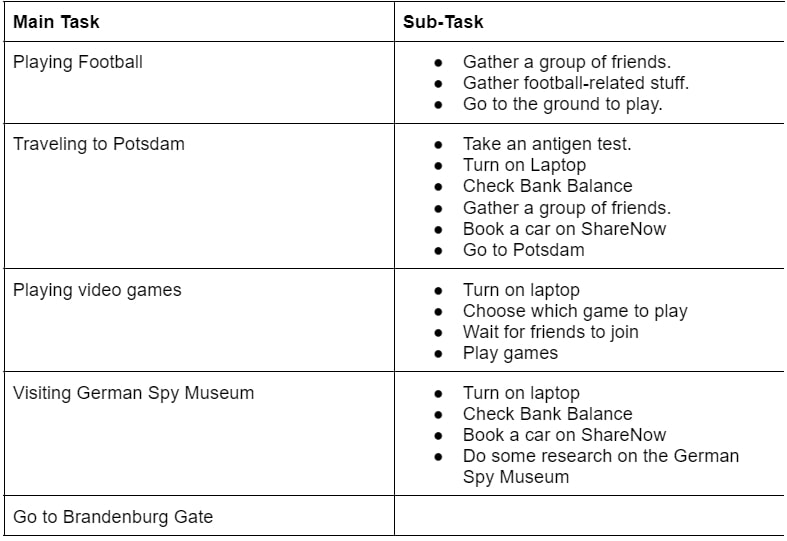

In [72]:
import pandas as pd
#Create a dictionary of tasks and store it in task_table

task_table = {'ID': [i for i in range(1,16)],'Description':['Take an antigen test',
                                                      'Turn on my Laptop', 
                                                      'Gather a group of friends',
                                                      'Get ready to play football(gather all required things)', 
                                                      'Go to the ground and play',
                                                      'Book a car on ShareNow', 
                                                      'Drive to Postdam', 
                                                      'Choose which video game to play',
                                                      'Wait for friends to join', 
                                                      'Play the video game', 
                                                      'Do some research on the German Spy Museum',
                                                      'Buy Ticket for the museum', 
                                                      'Go to the musemum and enjoy',
                                                      'Check your bank Balance',
                                                       'Go to Brandunberg Gate alone'],
         'Duration':[30, 2, 20, 15, 150, 5, 150, 5, 5, 120, 30, 10, 70, 5, 130],
         'Dependencies':[[], [], [], [3], [4], [2, 3], [1, 6], [2], [8], [9], [2], [14], [12], [2], []],
         'Status':['N' for i in range(15)],
         'Priority':[100, 100, 20, 50, 60, 60, 80, 10, 10, 20, 70, 80, 90, 100, 5],
         'Fixed Time Constraint':['None', 'None', 'None', 'None', 900, 'None', 'None', 'None', 'None', 'None', 'None', 'None',
                                 720, 'None', 'None']}

#Turn the dictionary of tasks into a pandas data frame
df = pd.DataFrame(task_table)
df

,ID,Description,Duration,Dependencies,Status,Priority,Fixed Time Constraint
0,1,Take an antigen test,30,[],N,100,None
1,2,Turn on my Laptop,2,[],N,100,None
2,3,Gather a group of friends,20,[],N,20,None
3,4,Get ready to play football(gather all required...,15,[3],N,50,None
4,5,Go to the ground and play,150,[4],N,60,900
5,6,Book a car on ShareNow,5,"[2, 3]",N,60,None
6,7,Drive to Postdam,150,"[1, 6]",N,80,None
7,8,Choose which video game to play,5,[2],N,10,None
8,9,Wait for friends to join,5,[8],N,10,None
9,10,Play the video game,120,[9],N,20,None


**B.** Explain why each of the activities and tasks you have chosen above is relevant to include in your schedule. Use this prompt as an opportunity to engage more deeply with the culture that you are exposed to in your current location.

The activites I choose mainly represent the city expereinces that I will have to do this semester. As I wanted to focus on the History of Berlin, I tried to opt for the city expereinces that revolved around this. So I included going to the German Spy Museum which is part of this city experience. I also mainly focussed on activities that I had done on the last Friday, thus I also inlcuded travelling to Postdam, as me and a couple of friends had a spontaneous trip there, this can also be considered to self issued city experience. I further included the activities that I mostly carry out on a Friday, like going out to play football, playing video games, and visiting at least one new place in the city, while also including the other tasks that I would require to do these main tasks, like getting an antigen test, turning on my laptop, gatehring firends etc. I also included an essential task in order to summarize how my day ends, sleep.

## Q2-Preparing your algorithmic strategy

The main focus of this assignment is on the algorithmic strategies behind your design of the scheduler. You may find it helpful to refer to the #optimization [white paper](https://course-resources.minerva.kgi.edu/uploaded_files/mu/00247269-0537/optimization-cornerstone-resource.pdf) for inspiration on tackling similar problems. 

Explain your answers to these questions as clearly as you can. To guide you as you work on each of these prompts, remember that the critical points you should focus on are (a) how and why this strategy works and (b) why it is better than possible alternatives? 

**A.** So far, you have stored the information about these activities and sub-tasks in a table (possibly a pandas dataframe). What other data structures will you use to digest the table's information properly? Why? 

*Feel free to provide as many details in your answer as you deem necessary, such as “at this stage in the algorithm I will work with ____, and later on I will use ____ to do _____.”*

I have stored the information for the tasks in a table as a pandas data frame. Using pandas allows me to call on my table efficiently when I am using classes. For the data structure, I mainly utilized priority queue, which is a data structure similar to stack and mainly arranges the entries provided based on their priority. Here I could have assigned a lower number to have a higher priority or a larger number to have a higher priority, as universally we think of big numbers as having more importance; thus, I went with the latter approach. We can assume the lowest priority would be 1 (0 would most likely mean the task is meaningless), meaning we would most likely not commit to it. Still, we needed a suitable value to act as a good benchmark for the highest priority. Thus, I used 100, which allows us to quickly get an idea of how a particular task's priority holds in comparison to the most important task. For example, a task with a 40 priority value will have 40% of the priority that we give to the most important task. As we have already discussed, we will assume a higher numerical value of priority will mean that the task has more priority, we will be utilizing max heap data structure which will allow us to get the highest priority task to the top node so we can pop it off to another list in order to arrange it, and knowing that we can access this top node, the root, in constant time this approach will be most effective.

As some of my tasks will have time constraints, I plan to use the time format that we discussed in class during our breakouts. Using these two types of criteria meant I would have to use two priority queues, one which focussed on the priority of the task "priority_queue" and the other focusing on the time constraints, "time_constraint_queue," which would provide tasks that need to be completed earlier with higher priority. This will allow us to prioritize the time constraint tasks when that particular task is coming up and arrange the order of the task scheduler accordingly.

**B.** Describe how your scheduler will work at a very high level. Consider explaining the algorithmic approach to scheduling to a peer who has not taken CS110 before. Avoid using technical jargon and instead focus on how the algorithm digests several tasks and returns an output.

Note: You *can* consider producing a flowchart to detail your chosen algorithmic strategy (for a reference on flowcharts, please check [this resource](https://courses.minia.edu.eg/Attach/16036flowchart-algorithm-manual.pdf).  

To start, we need to take in information regarding the tasks. These are the task ID (a numeric value that helps us keep track of different tasks when discussing dependencies), task description (short explanation regarding what the task is), duration of the task (the amount of time it takes to complete the task in minutes), task dependencies (knowledge of what tasks have to be done beforehand in order for this task to be started, using task ID we can see if task 7 is dependent on task 1, 3, 4 we can write task 7's dependencies as [1, 3, 4]), task priority (the importance of a task with values ranging from 1 to 100), and time constraint (some tasks will have to be completed at a particular time, so this tells us the time at which this task is supposed to be done).

We will split the tasks into two queues, which is basically a line of tasks that are waiting to be done, like waiting in line in the cafeteria. The task at the start of the line will be done first, while we will do the task at the end of the line last. We also need to consider the fact that certain tasks can only be added to the queue when they can be done, which would mean that we will need to fulfill the tasks that they are dependent on before forming a queue. Imagine that a task is doing pre-class work. In order to do that, I would first require to turn on my laptop. So as we cannot commence the task of doing pre-class work, it will not be added to the queue. Only tasks with no dependencies will be added to the queue. In this case, that would be turning on my laptop. There are no prerequisites to be fulfilled in order to turn on my laptop. The two queues that I highlighted at the start divide the tasks into two categories, one which I can do any time of the day, the other which I can only do at certain times of the day.

An example would be that I could exercise at any time, but if I am going to watch a movie I will have to be there at a certain time, so I cannot be late. Now, we can incorporate both of these queues by looking at the task's duration. Imagine that we are deciding whether to exercise or not and at the same time we have to leave for the cinema at 08:00 pm. Now we can see if we can complete the exercise before the departure time, we should do it. Otherwise, we should wait until we have watched the movie and returned. While checking for which tasks need to be done, we give the tasks that have a specific time constraint a little more priority as before doing any tasks that we currently can do, we check if the time right now is approaching the time for that time constraint task.

**C.** Now, let’s dive into the more technical part of the algorithmic approach. Why is a priority queue a well-suited data structure to prioritize tasks? A priority queue demands a key with which to organize the different tasks. Explain how you have defined and computed the priority value of each task and/or sub-task. 

*Please note: “More important tasks have higher priorities” is not a sufficient answer. “Brushing my teeth has a priority of 70, and dressing up has a priority of 60 because I want to brush my teeth before putting some clothes on” is not sufficiently explanatory either.*

The priority queue we are using here is a specific instance of a max heap data structure, where the key of each node will act as the priority value. This key value will have to be greater than or equal to or greater than its child node. This is a good approach as this will allow us to access the most important tasks at any given time and help us remove the task in O(logn) time so that we do not end up repeating the task. We come to this time complexity as we are using the max heap data structure, which uses the heappop method to return the topmost node while we heapify the remaining heap in order to maintain the order for max heap. This is all done in O(logn) as we need to go down the top node log n times with log n being the number of levels (having 16 elements in a heap would mean we have 4 levels). I also used another method called heapup, which allows us to access the top node in a priority queue without removal, thus allowing us to compare the two priority queues in constant time. The heappush method is also useful as it will enable us to dynamically update the heap when a particular task is ready to be executed when its dependencies have been fulfilled. In a nutshell, we can see that the priority queue is a well-suited data structure for a task scheduler as it allows us to update our heap dynamically. Through the use of heappop and heappush, access certain items from the heapup by using heapup, and has low runtime complexities make this an efficient data structure.

The process of determining the priority was mostly a manual task. For the tasks that were not constraint by time, the priority was mainly based upon the idea of utility that I would personally assign to these tasks. Here the value 1 would represent the least amount of care while the value of 100 represents that I cannot live without doing this task type of importance. The values in between can range between these two extremes representing an ordinal scale where each increasing value would represent more importance than the previous value. Based on this idea of scaling, I assigned priority based on how important that particular task is for me currently. For example, playing video games and football will not hold too much importance as I can just go ahead and play tomorrow; however, when comparing these two tasks, I would see that playing football will allow me the opportunity to socialize more and actually get some exercise thus it would still have higher priority as compared to playing video games. We can also look at the scaling as a representation of how much damage it will do to me if I fail to do that task. Again looking at video games, if I do not play today, I will be dissatisfied today but not on a huge scale. Thus, it will have a lower priority (I can do something else to entertain myself and not necessarily depend on video games). However, not taking an antigen test will have a huge problem for me as I will not be able to visit any place in the city without it; thus, its priority is represented as 100.

When looking at the priority of the time constraint tasks, we could have possibly compared the priority values of these tasks based on their fixed time constraints with a flip. Imagine two tasks have time constraints 1200 and 1340, respectively. Putting through MaxHeapq() will prioritize the latter task, but including a negative sign will flip this situation, and the task that is to be done earlier will be prioritized. This might seem effective in theory, but it will completely ruin the structure of priority that we have defined beforehand, as we set priority to scale from 1 to 100.

## Q3-Python implementation

**A.** Program an activity scheduler in Python, which receives the list of tasks above as input and returns a schedule for you to follow. Please use the code we have discussed in our session 10, “Heaps and priority queues,” as a basic skeleton that you are expected to improve on. 
- Please refrain from using any external Python library for this question besides `pandas`, `math`, and the `random` modules. *Please note this prohibits the use of the heapq module.*
 - If you think you will need other libraries, please check with your course instructor first, before working on your implementation.

- Make sure your internal representation of tasks has all the fields described in the Overview section above, in addition to the priority value that will characterize each task.  Your activity scheduler must report when a task has been completed. For now, please ignore any constraints on how long the scheduler should run (the program will end when all tasks have been completed, even if, for some inputs, that means ending your day after midnight).
- Take the example of the input and output from the breakouts code (session 10) for illustrative purposes only; you can improve the formatting and presentation. You will notice that the formatting from that code doesn’t comply with the requirements that each activity needs to have 3 sub-tasks, nor do the tasks include their corresponding priority values. This is something that you are expected to improve on in this assignment.
 - The important aspect you should retain is that the scheduler's output is a schedule, i.e., a list of tasks to be done at a specific time. 


In [73]:
import pandas as pd
#Create a dictionary of tasks and store it in task_table

task_table = {'ID': [i for i in range(1,16)],'Description':['Take an antigen test',
                                                      'Turn on my Laptop', 
                                                      'Gather a group of friends',
                                                      'Get ready to play football(gather all required things)', 
                                                      'Go to the ground and play',
                                                      'Book a car on ShareNow', 
                                                      'Drive to Postdam', 
                                                      'Choose which video game to play',
                                                      'Wait for friends to join', 
                                                      'Play the video game', 
                                                      'Do some research on the German Spy Museum',
                                                      'Buy Ticket for the museum', 
                                                      'Go to the musemum and enjoy',
                                                      'Check your bank Balance',
                                                       'Go to Brandunberg Gate alone'],
         'Duration':[30, 2, 20, 15, 150, 5, 150, 5, 5, 120, 30, 10, 70, 5, 130],
         'Dependencies':[[], [], [], [3], [4], [2, 3], [1, 6], [2], [8], [9], [2], [14], [12], [2], []],
         'Status':['N' for i in range(15)],
         'Priority':[100, 100, 20, 50, 60, 60, 80, 10, 10, 20, 70, 80, 90, 100, 5],
         'Fixed Time Constraint':['None', 'None', 'None', 'None', 900, 'None', 'None', 'None', 'None', 'None', 'None', 'None',
                                 720, 'None', 'None']}

#Turn the dictionary of tasks into a pandas data frame
df = pd.DataFrame(task_table)
df



,ID,Description,Duration,Dependencies,Status,Priority,Fixed Time Constraint
0,1,Take an antigen test,30,[],N,100,None
1,2,Turn on my Laptop,2,[],N,100,None
2,3,Gather a group of friends,20,[],N,20,None
3,4,Get ready to play football(gather all required...,15,[3],N,50,None
4,5,Go to the ground and play,150,[4],N,60,900
5,6,Book a car on ShareNow,5,"[2, 3]",N,60,None
6,7,Drive to Postdam,150,"[1, 6]",N,80,None
7,8,Choose which video game to play,5,[2],N,10,None
8,9,Wait for friends to join,5,[8],N,10,None
9,10,Play the video game,120,[9],N,20,None


In [74]:
class Maxheapq:
    """ 
    A class that implements properties and methods 
    that support a max priority queue data structure

    Attributes
    ----------
    heap : array
    A Python list where key values in the max heap are stored
    heap_size: int
    An integer counter of the number of keys present in the max heap
    """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value which accesses the priority of task

        Returns
        ----------
        None
        """
        
        if key.priority < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)].priority < self.heap[i].priority:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of the root node of the subtree to be heapify
            The priority value of the nodes is accessed

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].priority>heap[i].priority:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority > heap[largest].priority:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heapup(self):
        '''
        returns the largest key in the max priority queue without removing it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap without extracting it
        '''
        
        return self.heap[0]
    
    def heappop(self):
        """
        returns the largest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk



In [75]:
class Task:
    """
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - priority: Priority level of a task (ranging from 0 to 100)   
    - status: Current status of the task:       
    - time_constraint: time constraint of task
   
    """
    
    #Initializes an instance of Task
    def __init__(self,task_id,description,duration,dependencies,status,priority,time_constraint):
        self.id = task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.status=status
        self.time_constraint = time_constraint
        
    def __repr__(self):
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tStatus: {self.status}\n\tPriority: {self.priority}\t\nTime constraint: {self.time_constraint}"

    def __lt__(self, other):
        return self.priority < other.priority    
    

In [76]:
class TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues, considering fixed time constraints
    """
    
    #Initialize the status of tasks
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    #Initialize the task list and the priority queues, with and without time constraint
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = Maxheapq()
        self.time_constraint_queue = Maxheapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        #Example: If task_id is 1, then it removes 1 from the dependencies
        #of all the tasks that have it as a dependency

        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: two list of tasks, one time constraint and one without time constraint,
                that are ready to execute (i.e. tasks with no pending task dependencies)
        """
        
        for task in self.tasks:
            #Check for tasks that do not have time constraint
            if task.status == self.NOT_STARTED and len(task.dependencies) == 0 and task.time_constraint == 'None': 
                
                task.status = self.IN_PRIORITY_QUEUE #As task can be done there is a status change
                
                #Push task into the priority queue that is not time constraint
                self.priority_queue.heappush(task)
                
            elif task.status == self.NOT_STARTED and task.dependencies == [] and isinstance(task.time_constraint, int):
                task.status = self.IN_PRIORITY_QUEUE#As task can be done there is a status change
                # Push task into the priority queue that is time constraint
                self.time_constraint_queue.heappush(task)
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
                                
    
    def run_task_scheduler(self, starting_time = 480):
        
        '''
        The key method of this class which prints out the whole task schedule
        
        Input: List of tasks and starting time in Hour*60
        
        Output: The order of doing the tasks, what time to do them, how long it takes to do them, 
                and the total time taken to complete all tasks.
        '''
        
        current_time = starting_time
        
        #Acts as a termination case which terminates the method when there no more tasks left to be done, none in either queue and no unstarted tasks
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0 or self.time_constraint_queue.heap_size > 0:
            
            #Extract the tasks that are ready to be executed and have no dependecies
            
            self.get_tasks_ready()
            
            #Condition when tasks are ready to be executed in both queue
            if self.time_constraint_queue.heap_size > 0 and self.priority_queue.heap_size > 0:
                
                #Selects the top most tasks from both queues and assigns them to variables without removing them from heap
                time_constraint_task = self.time_constraint_queue.heapup()
                priority_task = self.priority_queue.heapup()

                #If we do the task in the priority queue, will we miss our fixed time constraint task?
                #Example: if a task finishes after the starting time of the Consequential conversation, we want to 
                #do the Consequential conversation task first.
                
                #Check to see if we cannot complete the task in priority queue before the time constraint task
                if priority_task.duration + current_time > time_constraint_task.time_constraint:
                    
                    #Select top task from time constraint queue and remove it from the queue
                    task = self.time_constraint_queue.heappop()
                    print(f"⏰Simple Scheduler at time {self.format_time(task.time_constraint)} started executing task {task.id} that takes {task.duration} mins")
                    
                    #As we are doing our time constraint task right now, the current time will be the time constraint plus
                    #the duration of the task
                    
                    current_time = task.time_constraint+task.duration            
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                    
                    #Remove task from dependencies and update status to completed
                    self.remove_dependency(task.id)
                    task.status = self.COMPLETED
            
            #Condition when the task ready to be executed are only present in the time constraint queue
            if self.time_constraint_queue.heap_size > 0 and self.priority_queue.heap_size == 0:
                
                #Select top task from time constraint queue and remove it from the queue
                task = self.time_constraint_queue.heappop()
                
                print(f"⏰Simple Scheduler at time {self.format_time(task.time_constraint)} started executing task {task.id} that takes {task.duration} mins")
                
                #As we are doing our time constraint task right now, the current time will be the time constraint plus
                #the duration of the task
                
                current_time = task.time_constraint+task.duration  
                
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                
                #Remove task from dependencies and update status to completed
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
            
            #Condition when the task ready to be executed are only present in the main priority queue
            if self.priority_queue.heap_size > 0 :  
                
                #Select top task from priority queue and remove it from the queue
                task = self.priority_queue.heappop()
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration            
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                
                #Remove task from dependencies and update status to completed
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
            

        total_time = current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        


In [78]:
#Store the tasks in the pandas data frame as a list
tasks_list = [Task(*list(df.iloc[i])) for i in range(15)]

#Initialize TaskScheduler class the list tasks
task_scheduler = TaskScheduler(tasks_list)

#Run the task scheduler!
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 8h00 started executing task 1 that takes 30 mins
✅ Completed Task 1 - 'Take an antigen test' at time 8h30

⏰Simple Scheduler at time 8h30 started executing task 2 that takes 2 mins
✅ Completed Task 2 - 'Turn on my Laptop' at time 8h32

⏰Simple Scheduler at time 8h32 started executing task 14 that takes 5 mins
✅ Completed Task 14 - 'Check your bank Balance' at time 8h37

⏰Simple Scheduler at time 8h37 started executing task 12 that takes 10 mins
✅ Completed Task 12 - 'Buy Ticket for the museum' at time 8h47

⏰Simple Scheduler at time 8h47 started executing task 7 that takes 150 mins
✅ Completed Task 7 - 'Drive to Postdam' at time 11h17

⏰Simple Scheduler at time 11h17 started executing task 11 that takes 30 mins
✅ Completed Task 11 - 'Do some research on the German Spy Museum' at time 11h47

⏰Simple Scheduler at time 11h47 started executing task 6 that takes 5 mins
✅ Completed Task 6 - 'Book a car on ShareNow' at time 11h52

⏰Simple Scheduler at time 12h00 star

**B.** In addition to the actual scheduler, provide at least one simple example to demonstrate how your scheduler prioritizes tasks based on their priority value. Demonstrate how changing the order of the activities in the input still produces the same output (the order of the scheduled tasks should be uniquely determined by their priority values).


In [79]:
import pandas as pd
#Create a dictionary of tasks and store it in task_table
import random
task_table = {'ID': [i for i in range(1,16)],'Description':['Take an antigen test',
                                                      'Turn on my Laptop', 
                                                      'Gather a group of friends',
                                                      'Get ready to play football(gather all required things)', 
                                                      'Go to the ground and play',
                                                      'Book a car on ShareNow', 
                                                      'Drive to Postdam', 
                                                      'Choose which video game to play',
                                                      'Wait for friends to join', 
                                                      'Play the video game', 
                                                      'Do some research on the German Spy Museum',
                                                      'Buy Ticket for the museum', 
                                                      'Go to the musemum and enjoy',
                                                      'Check your bank Balance',
                                                       'Go to Brandunberg Gate alone'],
         'Duration':[30, 2, 20, 15, 150, 5, 150, 5, 5, 120, 30, 10, 70, 5, 130],
         'Dependencies':[[], [], [], [3], [4], [2, 3], [1, 6], [2], [8], [9], [2], [14], [12], [2], []],
         'Status':['N' for i in range(15)],
         'Priority':[100, 100, 20, 50, 60, 60, 80, 10, 10, 20, 70, 80, 90, 100, 5],
         'Fixed Time Constraint':['None', 'None', 'None', 'None', 900, 'None', 'None', 'None', 'None', 'None', 'None', 'None',
                                 720, 'None', 'None']}

#Turn the dictionary of tasks into a pandas data frame
df = pd.DataFrame(task_table)
df



,ID,Description,Duration,Dependencies,Status,Priority,Fixed Time Constraint
0,1,Take an antigen test,30,[],N,100,None
1,2,Turn on my Laptop,2,[],N,100,None
2,3,Gather a group of friends,20,[],N,20,None
3,4,Get ready to play football(gather all required...,15,[3],N,50,None
4,5,Go to the ground and play,150,[4],N,60,900
5,6,Book a car on ShareNow,5,"[2, 3]",N,60,None
6,7,Drive to Postdam,150,"[1, 6]",N,80,None
7,8,Choose which video game to play,5,[2],N,10,None
8,9,Wait for friends to join,5,[8],N,10,None
9,10,Play the video game,120,[9],N,20,None


In [80]:
#Store the tasks in the pandas data frame as a list
tasks_list = [Task(*list(df.iloc[i])) for i in range(15)]
#Randomzie order of tasks in the list tasks
random.shuffle(tasks_list)
#Initialize TaskScheduler class the list tasks
task_scheduler = TaskScheduler(tasks_list)
#Run the task scheduler!
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 8h00 started executing task 2 that takes 2 mins
✅ Completed Task 2 - 'Turn on my Laptop' at time 8h02

⏰Simple Scheduler at time 8h02 started executing task 1 that takes 30 mins
✅ Completed Task 1 - 'Take an antigen test' at time 8h32

⏰Simple Scheduler at time 8h32 started executing task 14 that takes 5 mins
✅ Completed Task 14 - 'Check your bank Balance' at time 8h37

⏰Simple Scheduler at time 8h37 started executing task 12 that takes 10 mins
✅ Completed Task 12 - 'Buy Ticket for the museum' at time 8h47

⏰Simple Scheduler at time 8h47 started executing task 11 that takes 30 mins
✅ Completed Task 11 - 'Do some research on the German Spy Museum' at time 9h17

⏰Simple Scheduler at time 9h17 started executing task 3 that takes 20 mins
✅ Completed Task 3 - 'Gather a group of friends' at time 9h37

⏰Simple Scheduler at time 9h37 started executing task 6 that takes 5 mins
✅ Completed Task 6 - 'Book a car on ShareNow' at time 9h42

⏰Simple Scheduler at time 12h00 s

By using the random function, I was able to randomize the order of the list for tasks. We can see that even though we randomize the task order, the total time to complete the tasks remains the same, 13hr50min. We can also see that the order of tasks is still effective as we are still completing the dependencies task before the task that requires these dependencies while also ensuring that we are doing the time constraint tasks on time. We might notice some changes in the order of tasks that have 100 priority and have no dependency, but that does not matter as these tasks are compulsory anyways. Doing any of them before the other will not mess up our schedule.

## Q4–Let’s test-drive your scheduler

It’s time to take your data scheduler for a spin! Use this as an opportunity to efficiently plan a day where you explore your city of rotation. 

**A.** Produce a critical analysis of your scheduler, including pictures you take for this test drive highlighting:
- all the benefits in following the algorithmic directives defined in the instructions (rather than deciding on the spot where to go next!),
- any failure modes, and/or limitations you envision it running into, 
- any patches you added to continue test-driving your code (perhaps the scheduler told you to take the bus #30 at 4:30 pm in a specific location, but the bus arrived earlier and you missed it).

<b>Potsdam</b>

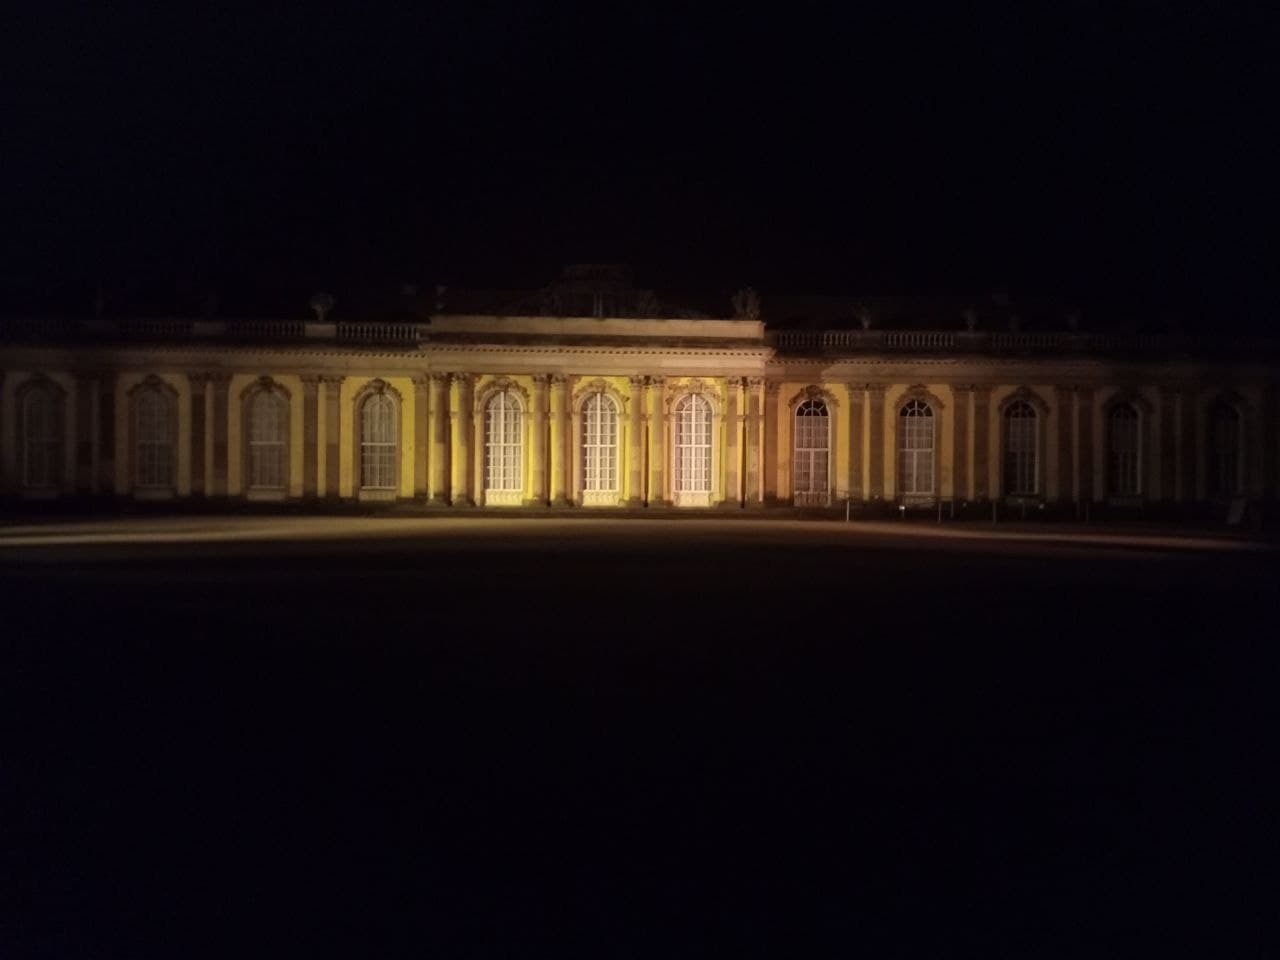

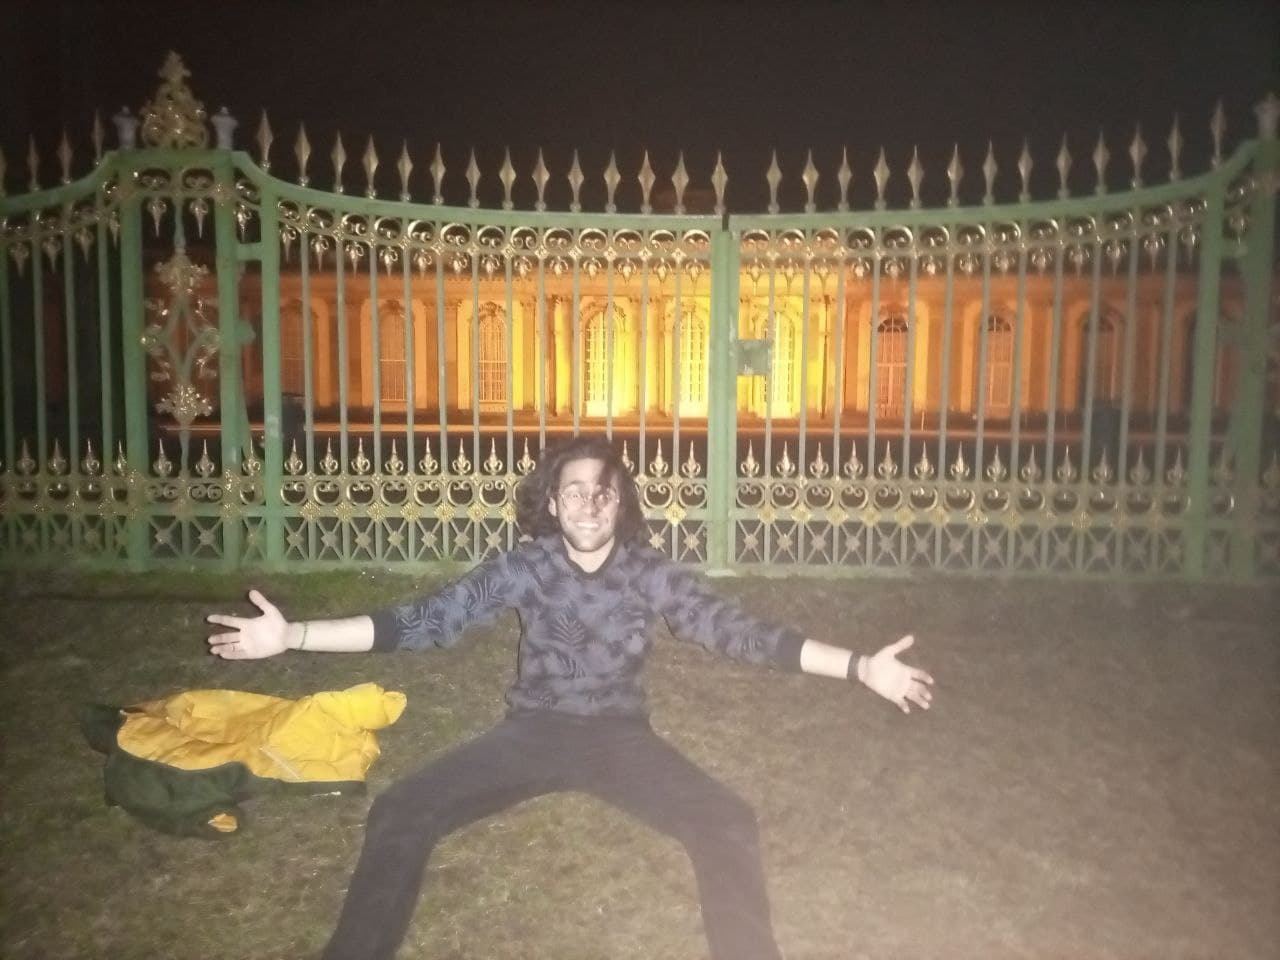

<b>Football</b>

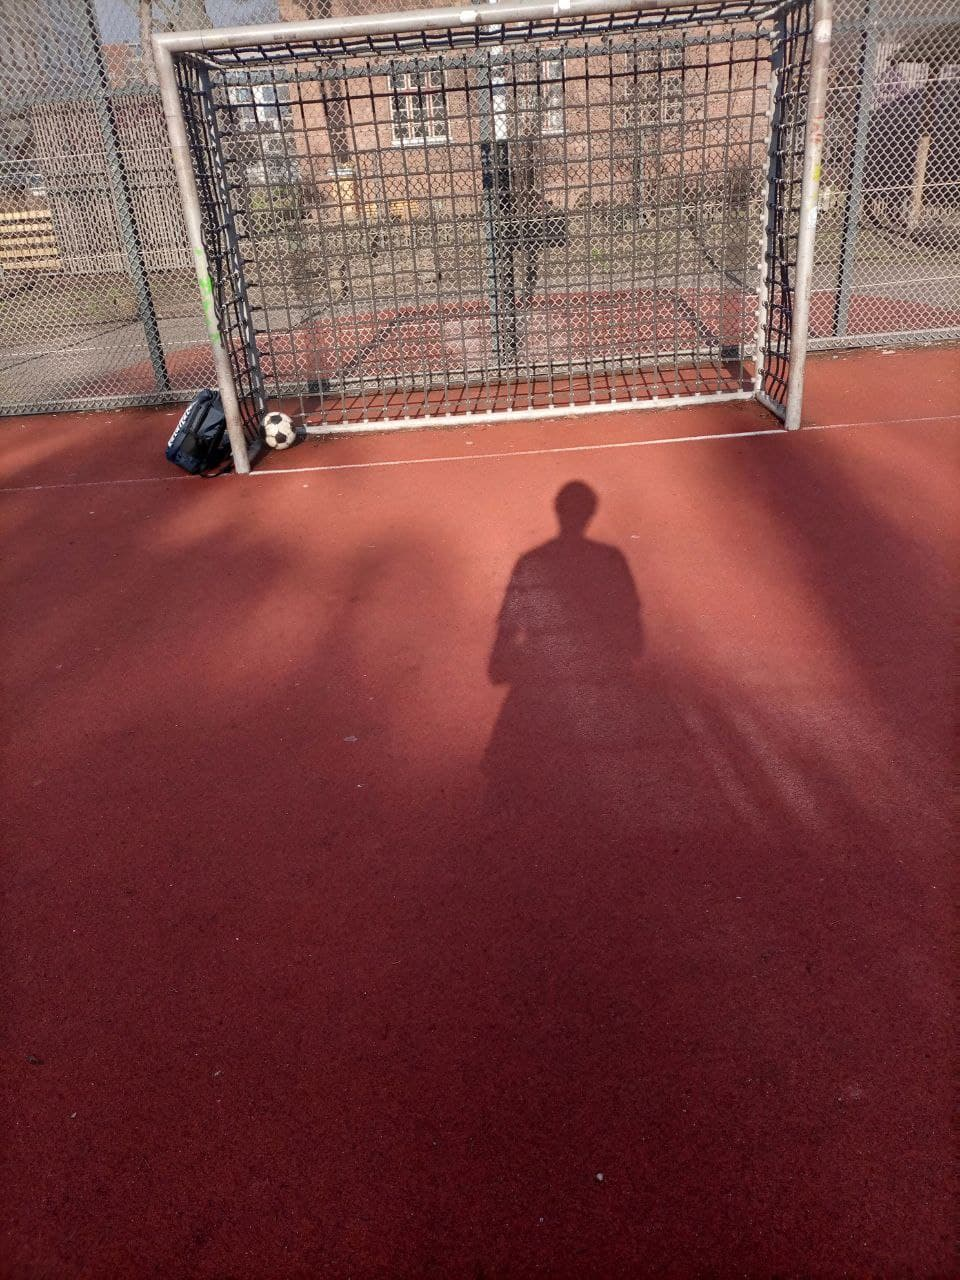

<b>Benefits:</b>

Overall we can see that algorithm is more effective than a human making the same decisions. The algorithm's main benefit would be taking into consideration the dependencies and the fixed time tasks. As humans, we tend to go with the flow mostly, or it might just be me. Going with the flow can seem easy and fun, but doing so can cause us to misjudge which activities need to be done before others. So looking at the current tasks, we can see that if we want to play football, but we leave that task towards the last minute, we would not be able to gather anyone else to play with us. Thus, we can possibly fail to judge the time constraint (going to football), the duration (gathering friends), and the dependency (playing with friends). Following the algorithm provides us with an ideal way of going about our schedule, allowing us to pack multiple tasks in our schedule with the only problem coming from the human side (not following the regime properly, .i.e waking up late).

<b>Failures:</b>

The algorithm will fail to take into consideration humans' ability to adapt. If the code sees the task of having a meeting online and the task of going to the German Spy Museum overlap, it won't be able to adjust the tasks as both tasks can have their time constraints overlap. As humans, we know that we do not necessarily have to sit cozily in our chair to take the meeting. We have internet, so I can easily take the meeting while heading for the museum; thus, I am able to do both tasks while actually keeping my schedule intact. 

We also have to consider the time gap problem, which arises when the task in the priority queue has a long duration and thus cannot be completed before the time-constrained task, even though there is sufficient time in between to do other tasks. This will push the priority queue task to be completed after the time-constrained task. This mainly happens as we are only looking at the values that are at the top of the heap and ignoring other tasks that have less duration and can be completed before the time constraint task. A possible solution will be to iterate through the priority queue until we find a task that is doable in that time and then implement it; however, this will also bring in complexity issues as in the worst case, we will have to iterate through the whole queue while making comparisons.

<b>Patches:</b>

The main concern I had was when making comparisons in order to decide when to push a task from our time-constrained queue and when not to. Initially, I did not consider the fact that the unconstrained priority queue can become empty before the time-constrained queue, assuming that the initial comparison will handle all the time-constrained tasks. This messed up my schedule, and I had to add an additional comparison statement that checked for this condition, no items in the priority queue while there are items in the time-constrained queue.

**B.** Examine the efficiency of your **schedule** (the output of your program) and include any explicit reference to the metrics you employed to determine this. 

One way I wanted to check the efficiency of the schedule was actually to follow it. By following it, I realized that there were minor inefficiencies in the schedule. As discussed before, we can see that due to the algorithm's inability to handle the ability of multitasking, it can sometimes be inefficient. I saw this happen when I realized that I could technically do the task of playing video games and looking at the balance simultaneously to save a bit of time. Still, we have to define them separately as they are separate tasks that ensure that they take place separately. Also, there can be certain changes in the schedule based on real-life circumstances, which this scheduler will not be able to handle as it can only handle pre-added tasks. So going one step astray from the defined schedule can make the whole scheduler useless. We also see that there is a time gap issue that mainly arises when we wait out the time before a time constraint task as our priority task right now has a long duration. As humans, we know we will not remain idle and can use this time to do something, but the code does not know that, making the schedule a little bit inefficient.

**C.** Perform experiments to determine the efficiency of your **scheduler** (the actual program). Be as creative as you want in designing those experiments!


In [81]:
#Create a new class scheduler class with no print output

class TaskScheduler_no_print:
    """
    A Simple Daily Task Scheduler Using Priority Queues, considering fixed time constraints
    """
    
    #Initialize the status of tasks
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    #Initialize the task list and the priority queues, with and without time constraint
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = Maxheapq()
        self.time_constraint_queue = Maxheapq()

    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)            
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        #Example: If task_id is 1, then it removes 1 from the dependencies
        #of all the tasks that have it as a dependency

        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: two list of tasks, one time constraint and one without time constraint,
                that are ready to execute (i.e. tasks with no pending task dependencies)
        """
        
        for task in self.tasks:
            #Check for tasks that do not have time constraint
            if task.status == self.NOT_STARTED and not task.dependencies and task.time_constraint == 'None': 
                task.status = self.IN_PRIORITY_QUEUE #As task can be done there is a status change
                
                #Push task into the priority queue that is not time constraint
                self.priority_queue.heappush(task)
                
            elif task.status == self.NOT_STARTED and task.dependencies == [] and isinstance(task.time_constraint, int):
                task.status = self.IN_PRIORITY_QUEUE#As task can be done there is a status change
                # Push task into the priority queue that is time constraint
                self.time_constraint_queue.heappush(task)
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
                                
    
    def run_task_scheduler(self, starting_time = 480):
        
        '''
        The key method of this class which prints out the whole task schedule
        
        Input: List of tasks and starting time in Hour*60
        
        Output: The order of doing the tasks, what time to do them, how long it takes to do them, 
                and the total time taken to complete all tasks.
        '''
        
        current_time = starting_time
        
        #Acts as a termination case which terminates the method when there no more tasks left to be done, none in either queue and no unstarted tasks
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size > 0 or self.time_constraint_queue.heap_size > 0:
            
            #Extract the tasks that are ready to be executed and have no dependecies
            
            self.get_tasks_ready()
            
            #Condition when tasks are ready to be executed in both queue
            if self.time_constraint_queue.heap_size > 0 and self.priority_queue.heap_size > 0:
                
                #Selects the top most tasks from both queues and assigns them to variables without removing them from heap
                time_constraint_task = self.time_constraint_queue.heapup()
                priority_task = self.priority_queue.heapup()

                #If we do the task in the priority queue, will we miss our fixed time constraint task?
                #Example: if a task finishes after the starting time of the Consequential conversation, we want to 
                #do the Consequential conversation task first.
                
                #Check to see if we cannot complete the task in priority queue before the time constraint task
                if priority_task.duration + current_time > time_constraint_task.time_constraint:
                    
 
                    #Select top task from time constraint queue and remove it from the queue
                    task = self.time_constraint_queue.heappop()
                    
                    #As we are doing our time constraint task right now, the current time will be the time constraint plus
                    #the duration of the task
                    
                    current_time = task.time_constraint+task.duration            
                    
                    #Remove task from dependencies and update status to completed
                    self.remove_dependency(task.id)
                    task.status = self.COMPLETED
            
            #Condition when the task ready to be executed are only present in the time constraint queue
            if self.time_constraint_queue.heap_size > 0 and self.priority_queue.heap_size == 0:
                
                #Select top task from time constraint queue and remove it from the queue
                task = self.time_constraint_queue.heappop()
                
                
                #As we are doing our time constraint task right now, the current time will be the time constraint plus
                #the duration of the task
                
                current_time = task.time_constraint+task.duration  
                
                
                #Remove task from dependencies and update status to completed
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
            
            #Condition when the task ready to be executed are only present in the main priority queue
            if self.priority_queue.heap_size > 0 :  
                
                #Select top task from priority queue and remove it from the queue
                task = self.priority_queue.heappop()
                current_time += task.duration            
                
                #Remove task from dependencies and update status to completed
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
            

        total_time = current_time - starting_time             


In [82]:
import random



def random_tasks_generator(n=10):
    '''
    Makes a dictionary that contains randomized tasks
    
    Input: number of tasks
    Output: Dictionary of randomized tasks
    '''

    #Initialize table with ordered task description and random durations and priorities
    test_table = {'ID': [i for i in range(1,n+1)],'Description':[f'Task {i}' for i in range(1,n+1)],
            'Duration':[random.randint(1,60) for i in range(n)],
            'Dependencies':[],
            'Status':['not_yet_started' for i in range(n)],
            'Priority':[random.randint(0,100) for i in range(n)],
            'Fixed Time Constraint':[]}

    
    #Set ids
    ids = [i for i in range(1,n+1)]
    
    #Initialize dependencies
    dependencies = []
    
    #Dependencies defined in an order to remove repetetions and circular dependecies
    for i in range(2,n+1,3):#
        
        lst = []
        lst.append(i)
        dependencies.append(lst)
    for i in range(n-len(dependencies)):
        dependencies.append([])
    
    test_table['Dependencies'] = dependencies
    
    #Time constraints defined in random order to generate some tasks with no time constraint and some with them
    times = []
    for i in range(n):
        if random.random() < 0.5:
            times.append('None')
        else:
            sample = random.randrange(480,1440,240)
            if sample in times:
                times.append('None')
            else:
                times.append(sample)
        test_table['Fixed Time Constraint'] = times
    return test_table


In [84]:
import time

runtime_list = []
inputs_list = [n for n in range(1,1000,50)]
experiments = 100
for n in inputs_list:
    #Initialize variable to calculate the average for each input size
    sum_for_average = 0
    
    #Running trials to get an average value
    for trial in range(experiments):
        
        #Generate random tasks
        test_tasks = random_tasks_generator(n)
        test_tasks_df = pd.DataFrame(test_tasks)
        
        
        tasks = [Task(*list(test_tasks_df.iloc[i])) for i in range(n)]
        
        #Runtime calcuation
        start_time = time.time()
        task_scheduler = TaskScheduler_no_print(tasks)
        task_scheduler.run_task_scheduler()
        end_time = time.time()
        sum_for_average += end_time - start_time
        
    runtime_list.append(sum_for_average/experiments)



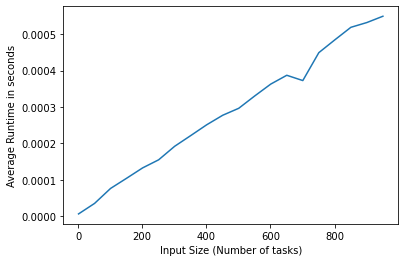

In [85]:
import matplotlib.pyplot as plt

plt.ylabel('Average Runtime in seconds')
plt.xlabel('Input Size (Number of tasks)')

plt.plot(inputs_list,runtime_list)
plt.show()

The experimental analysis runs 100 trials per input size to check the task scheduler's time complexity. We can see that the runtime scales linearly with the number of tasks. We had to be careful about two things when running the code: handling dependency loops and ensuring time constraints do not contradict each other. Dependency loops can occur when task 2 is dependent on task 3, and task 3 is dependent on task 2, which will cause the algorithm to crash. To overcome this, we ensured that each task got only a singular dependency while ensuring that the dependencies were unique as we were assigning them in increasing order. Time constraints contradiction can occur when for example, task 3 is dependent on task 2, but the time constraint for task 3 tells us to do it before task 2. We also gave only specific values the time constraint in increasing order to overcome this. 

## Q5–Getting back to the drawing board

**A.** Equipped with the answers to the previous question, would you use your algorithm to schedule your day? Explain why or why not. 

Well, it depends. The algorithm is heavily dependent on the human that is inputting the tasks. The algorithm heavily relies on priority values. A person can be biased when he has to write the priority values at the start of the day, which can potentially misshape his whole schedule, like thinking you will only play football for 2 hours. Still, you end up playing on the pitch for 3 hours. Your future tasks order will be messed up, and the task scheduler will be useless. However, we have to make it clear that the error rises due to humans' inability to decide and is not the algorithm's fault. If we were punctual, following the schedule would provide us with an almost optimum way of doing our tasks.

**B.** Provide a high-level description of how your scheduler should be improved. Then, zoom in and include details on how you would implement those changes in practice (with an appropriate discussion on data structures and Python implementation). 

*You should aim for a 150-300 word summary (~at least ten lines) that is both well-written and critical. Include as many details as you deem necessary for your analysis. Please include a word count.*

After going through the algorithm multiple times, I realized that some aspects of the algorithm could use some further tweaking. One of these problems was multitasking, which means we can do multiple tasks simultaneously. To solve this, we can define an attribute called multitasks for the Task class that has the task IDs of all other tasks with which we can do that task. For example, task3.multitasks = [4, 6]. This means that we will be able to do tasks 3, 4, and 6 together. As we are doing the tasks together, we can use the duration of the longest task as our total duration for the group. We need to be clear that we are assuming that we do not lose efficiency when doing multiple tasks together. We can try to prioritize the tasks that have many multitask by updating their priority based on the number of multiple tasks that can be done. We have to be careful when defining multiple tasks so we do not end up repeating the multitasks, task3.multitasks = [4, 6] and task4.multitasks[]. When putting these tasks in the priority queue, we can adjust the code to put the tasks in multitasks in the in priority queue status.

Another thing we could implement is optional tasks to help us relax. Right now, we have tasks that are arranged based on priority and time constraints, but by including the attribute for optional tasks, we can make the task scheduler more realistic. These types of tasks can be assigned 0 priority because well they are optional. These optional tasks can be used to fill the gap left when there is a gap between two tasks, like when we cannot do our priority task because its duration will overtake the time constraint. This is a small solution for this time gap problem and can introduce little activities that we would mostly not do. For me, it would be reading manga. So when we make the comparison for the priority queue time with the time constraint, if we are unable to do the priority task, we can fill the spot with these optional tasks with their duration being the difference between the time constraint of the task and the current time.

We also need to solve the issue of circular dependencies. A simple solution will be to utilize the dependencies attribute of the task. We can go through all the tasks, and eventually, we will be left with a task that has circular dependencies and cannot be completed. We can raise an error and ask the user to fix this error at this moment. For example, imagine task 1 is dependent on task 2, and task 2 is dependent on task 1. These tasks will not be completed, so that they will be left till the end. 

Word Count: 380 words

In [86]:
### your code here (use this cell if needed)

## Q6–HC applications 
Identify three HCs you have utilized in this assignment and reflect on your application in at least 50 words each (please include a word count).


#breakitdown:

I was able to effectively break down the questions into smaller sub-parts in order to help me solve the overall question. The description of the question assisted this breakdown. The breakdown can be seen when I separated the code cells for different classes to examine how each class worked and to reduce a cluster. It can also be seen in my approach for writing answers where I had made paragraphs that separated different ideas in order to solidify the main reasoning.

Word count: 65

#constraints:

The task scheduler heavily relied on the use of this HC as it was utilized in forming the time-constrained queue. To overcome the constraint of time, I created two priority queues that allowed me to set up the schedule effectively by considering how I would shape my other tasks around the fixed time tasks. 

Word Count: 48

#algorithms:

I effectively used code to run the task scheduler while also running an experimental analysis on this said scheduler. I effectively explained different steps of the code by use of suitable comments and docstrings. I tried to cut down extra lines of code to make it more concise and effective.

Word Count: 50

🏁 Congratulations on finishing the assignment!